## THE COMPLETE GUIDE PREPROCESSING

### STEP 1: LOADING THE DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml # dataset avaialable from sktlearn


In [2]:
np.random.seed(0)

In [3]:

"""
The target label is 'survival' -> 0 = No, 1 = Yes
"""
X, y = fetch_openml('titanic', version=1, return_X_y=True, as_frame=True)

In [4]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
X.shape

(1309, 13)

##### 1A. CHECK THE DATA TYPES 

In [6]:
"""
- pclass is int64 SHOULD BE ordinal
- 5 features containt MISSING VALUES 'age', 'cabin', 'boat', 'body', 'homde.dest'
"""
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(3), int64(3), object(5)
memory usage: 115.4+ KB


#### 1B. CLEANSING DATA

In [7]:
"""
- Cleansing data commonly implemented to data that has 'incorrect, irrelevant, inconsistency and inaccuracy'

- DROP IRRELEVANT DATA (name, ticket, cabin, boat, body and home.dest) -> 'boat' and 'body' are 
  the the target label (prediction). Since we know that any passenger with boat number
  is survived, and any passenger with a body identification number did not survive
"""
X.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True) # axis=1 'drop column', inplace=True -> affect original dataframe, 'False' generate a new dataframe

In [8]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S


### STEP 2: EXPLOATORY DATA ANALYSIS (EDA)

#### 2B. FEATURE CORRELATIONS

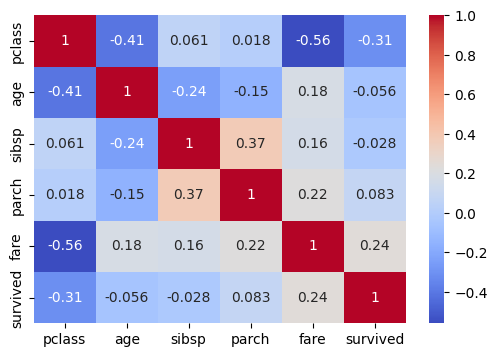

In [9]:
"""
- Find the FEATURES CORRELATION using HEATMAP
- From the headmap, the correlation between pclass and survival is tend to 'Negative Correlation', this brings the insight due to the
  the higher class looks like has the priority survival treatment (1st class potentially to be high survived)
"""

# merge input features (X) and target label (y)
df = pd.concat([X, y.astype('float')], axis=1)

# Plot heatmap
df_numeric = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(6, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm') # annot=True show the value on the cells, 'FALSE' hide
plt.show()

In [10]:
df_numeric.head()

,pclass,age,sibsp,parch,fare,survived
0,1,29.0000,0,0,211.3375,1.0
1,1,0.9167,1,2,151.5500,1.0
2,1,2.0000,1,2,151.5500,0.0
3,1,30.0000,1,2,151.5500,0.0
4,1,25.0000,1,2,151.5500,0.0


#### 2A. OUTLIERS

In [11]:
# LIST OF OUTLIERS
def detect_outliers(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)  # Kuartil pertama
        Q3 = df[column].quantile(0.75)  # Kuartil ketiga
        IQR = Q3 - Q1                   # Rentang antar kuartil
        lower_bound = Q1 - 1.5 * IQR    # Batas bawah
        upper_bound = Q3 + 1.5 * IQR    # Batas atas

        # Identifikasi data yang berada di luar batas
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].tolist()
    
    return outliers

# Mendeteksi outliers
outliers = detect_outliers(df)

# Menampilkan hasil
print("Outliers dari setiap kolom:")
for column, values in outliers.items():
    print(f"{column}: {values}")

Outliers dari setiap kolom:
pclass: []
age: [71.0, 80.0, 76.0, 70.0, 71.0, 67.0, 70.0, 70.5, 74.0]
sibsp: [3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3]
parch: [2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 5, 5, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 2, 2, 2, 6, 6, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 

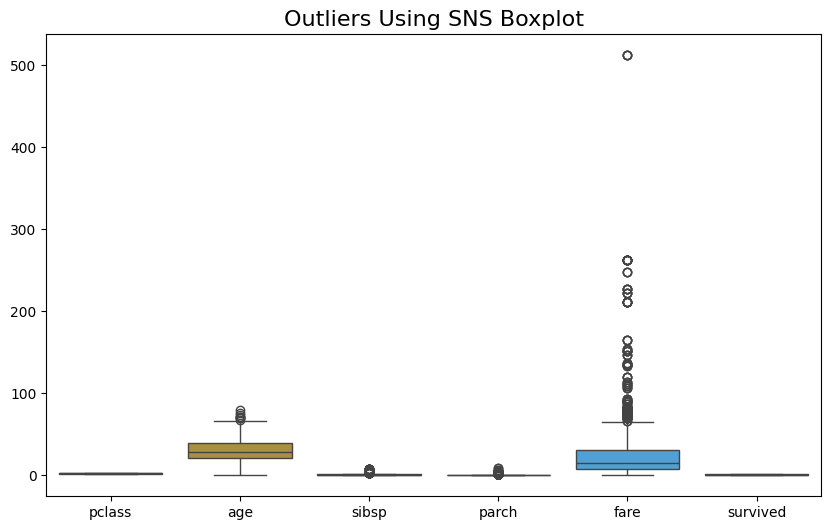

In [12]:
# VISUALIZATION OF OUTLIERS
"""
Use the Robust Standardization to handle the outliers than Standard Scaler
"""
plt.figure(figsize=(10,6))
sns.boxplot(data=df, palette='husl') # sns.boxplot (detecting outliers)
plt.title('Outliers Using SNS Boxplot', fontsize=16)
plt.show()

In [13]:
# CLASSIFICATION SURVIVED OR NOT
z = y.value_counts()/y.value_counts().sum() * 100
z

survived
0    61.802903
1    38.197097
Name: count, dtype: float64

### 2B. CHECK THE MISSING VALUE

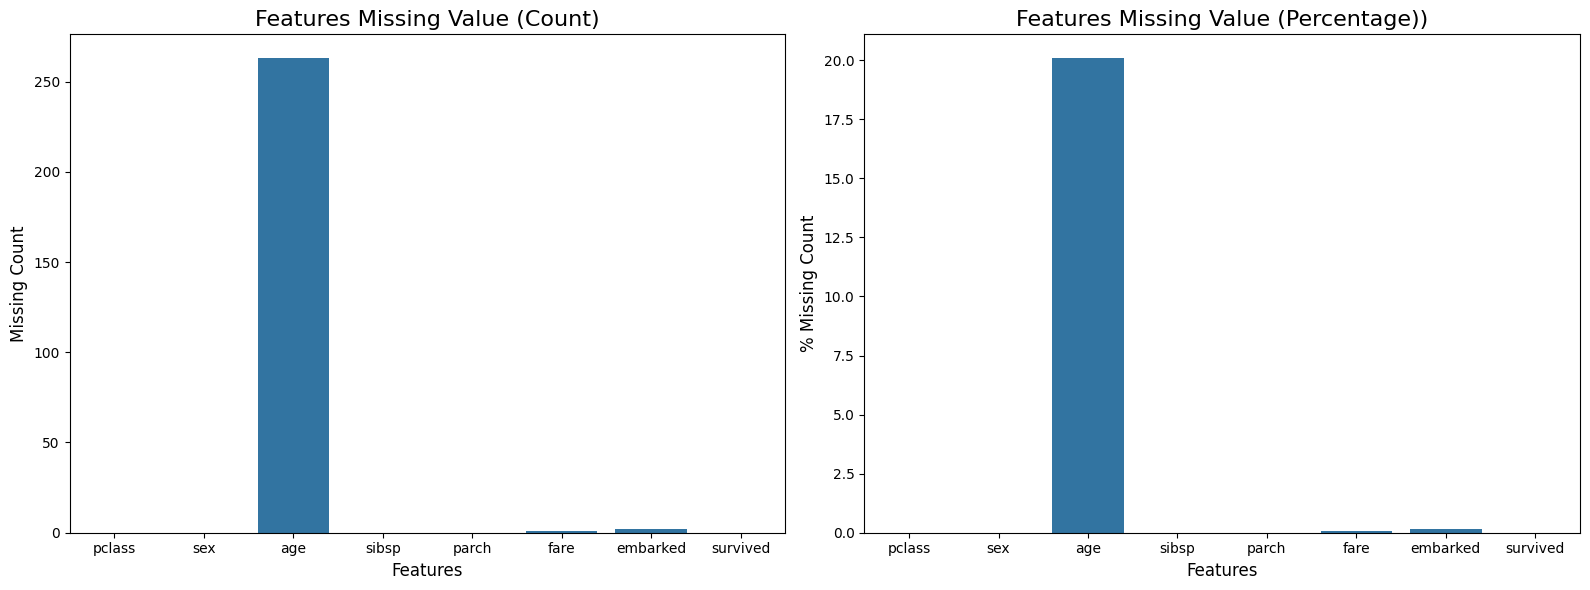

In [14]:
missing_value = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_summary = pd.DataFrame({
    'missing_val': missing_value,
    'missing_percentage': missing_percentage
})

# Membuat Subplot untuk jumlah missing values dan persentase missing values
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 row, 2 columns

# plot 1
sns.barplot(x=missing_value.index, y=missing_value.values, ax=axes[0])
axes[0].set_title('Features Missing Value (Count)', fontsize=16)
axes[0].set_xlabel('Features', fontsize=12)
axes[0].set_ylabel('Missing Count', fontsize=12)

# plot 2
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, ax=axes[1])
axes[1].set_title('Features Missing Value (Percentage))', fontsize=16)
axes[1].set_xlabel('Features', fontsize=12)
axes[1].set_ylabel('% Missing Count', fontsize=12)
plt.tight_layout()
plt.show()

In [15]:
missing_summary.head()

,missing_val,missing_percentage
pclass,0,0.000000
sex,0,0.000000
age,263,20.091673
sibsp,0,0.000000
parch,0,0.000000


### STEP 3: PREPROCESSING

#### 3A. HANDLING MISSING VALUES

In [16]:
X

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,14.4542,C
1305,3,female,NaN,1,0,14.4542,C
1306,3,male,26.5000,0,0,7.2250,C
1307,3,male,27.0000,0,0,7.2250,C


In [17]:
"""
- One of method to handle the missing values is 'Imputing' which change the missing values with a new value. Severals imputing method are describes as follows:
1. Simple Imputer (Using Median, Modulus, and Mean) -> Median is used if it sorted data and between min and max is significant far (like outlier)
   from sklearn.impute import SimpleImputer
   
2. Interpolation
3. KNN Imputer
5. Iterative Imputer: It looks like predict the missing value using model (such as linear) per row, iterative along the rows in the dataset

# impute for embarked — port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). 
# Since the value of categorical doesn't have the meaning full of the order, so we use SimpleImputer (statistical approach)
"""
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [18]:
# categorical features
cat_features = ['pclass', 'sex', 'embarked']      
    
cat_transformer = Pipeline(steps=[
   ('imputer', SimpleImputer(strategy='most_frequent')),
   ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [19]:
# numerical features
num_features = ['age', 'sibsp', 'parch', 'fare']

num_transformer = Pipeline(steps=[
   ('imputer', KNNImputer(n_neighbors=5)), # good in handling outliers
   ('scaler', RobustScaler())
])

In [20]:
# combine
preprocessor = ColumnTransformer(transformers=[
   ('cat', cat_transformer, cat_features ),
   ('num', num_transformer, num_features)
]) 

In [21]:
cleaned_data = preprocessor.fit_transform(X)
cleaned_data

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  8.42130184],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         2.        ,  5.86400732],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         2.        ,  5.86400732],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.30921503],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.30921503],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.28141254]])

In [22]:
cat_columns = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features)

In [23]:
list_columns = list(cat_columns) + num_features
list_columns

['pclass_1',
 'pclass_2',
 'pclass_3',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'age',
 'sibsp',
 'parch',
 'fare']

In [24]:
X_tranformed = pd.DataFrame(preprocessor.fit_transform(X), columns=list_columns)
X_tranformed

,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,age,sibsp,parch,fare
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.058824,0.0,0.0,8.421302
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.710782,1.0,2.0,5.864007
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.647059,1.0,2.0,5.864007
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,1.0,2.0,5.864007
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.294118,1.0,2.0,5.864007
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.911765,1.0,0.0,0.000000
1305,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.582353,1.0,0.0,0.000000
1306,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.205882,0.0,0.0,-0.309215
1307,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.176471,0.0,0.0,-0.309215


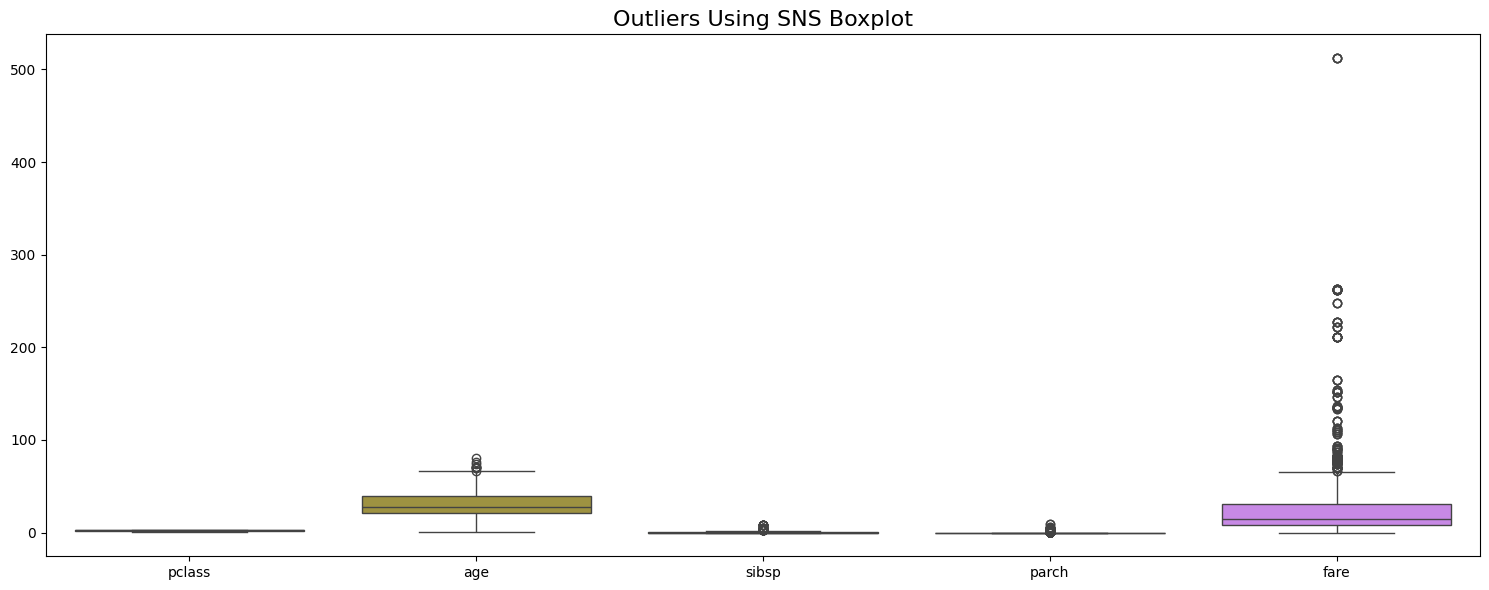

In [25]:
plt.figure(figsize=(15,6))
sns.boxplot(data=X, palette='husl') # sns.boxplot (detecting outliers)
plt.title('Outliers Using SNS Boxplot', fontsize=16)
plt.tight_layout()
plt.show()

In [26]:
model = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier())
])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['pclass', 'sex',
                                                   'embarked']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare'])])),
                ('clf', RandomForestClassifier())])

In [29]:
train_acc = model.score(X_train, y_train)
print(f'Train accuracy: {train_acc:.4f}')

test_acc = model.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Train accuracy: 0.9713
Test accuracy: 0.7939
